### Alternatives to the Markowitz Portfolio Problem

In [1]:
import sys
import numpy as np
import pandas as pd
import itertools
import  matplotlib.pyplot as plt
path='/home/jbohn/jupyter/personal/L1_Portfolio_Opt/'
sys.path.append(path)

from Features.features import load_features
from Split_Bregman.split_bregman_opt import split_bregman
from Split_Bregman.grid_search import grid_search
from Parameter_Estimation.bias_cov import reg_cov
from Parameter_Estimation.bias_mean import reg_mean

from Portfolio_Optimization.max_var_port import MaxRetPort
from Portfolio_Optimization.min_var_port import MinVarPort
from Portfolio_Optimization.mean_var_port import MeanVarPort, optimize_sharpe

ModuleNotFoundError: No module named 'portfolio_optimization'

### Prep Data and Features

In [ ]:
train_test_split=0.5
train_data, test_data = load_features(train_test_split)
train_data

,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WHR,WMB,WTW,GWW,WYNN,XEL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.628321,-1.285971,-0.811210,-2.432083,0.616121,0.176830,0.538743,1.631272,-0.538452,-0.596131,...,-0.207657,1.241682,-0.224387,0.041128,5.904149,-1.193047,-0.342566,-0.174548,3.116535,3.465148
2010-01-06,1.408218,0.045393,0.553813,-1.535767,1.057458,-0.531440,-0.253164,-0.212432,-0.235015,0.868174,...,-0.884311,3.193428,1.597067,0.379627,-1.320395,0.191851,-0.717461,-0.771667,-0.032304,8.338160
2010-01-07,0.071691,0.294622,0.825011,0.000000,-0.093539,-2.427090,-1.051132,-1.959530,-0.047069,-0.024706,...,2.123851,-0.710789,-0.295205,0.937728,2.113119,-0.432174,-0.028805,-2.531778,2.268103,10.616021
2010-01-08,0.702170,1.460205,0.509927,-2.044570,-0.398552,-0.822299,-1.256660,-0.543629,-0.141351,0.394477,...,2.103321,0.799284,-0.110934,1.169962,-0.719055,0.048113,0.028805,-0.325557,-2.122811,-1.631952
2010-01-11,-0.404037,-0.469430,0.507340,-1.839410,-0.094009,-0.091779,0.064831,-1.316890,0.446902,-0.989122,...,-0.640649,-0.621110,0.993936,0.420251,-0.324534,0.957398,1.713344,0.325557,2.185967,0.607538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,0.053927,0.303000,-0.043755,0.338579,-0.109443,0.591430,-0.112905,0.482834,0.082154,-0.597355,...,0.010458,-0.834438,-0.088298,-0.318574,-0.522166,2.232856,0.151239,0.319673,0.562442,-0.035058
2014-12-26,-0.420151,0.762348,0.327685,0.466928,-0.065722,0.343389,0.581993,-0.093701,-0.046938,-0.143644,...,0.677794,0.615528,-0.044178,0.042790,-0.351843,0.961420,0.479675,-0.294066,0.052565,0.140151
2014-12-29,0.270302,0.088268,-0.546748,-0.414938,-0.814182,-0.294259,-0.544341,-0.725811,-0.388069,0.759608,...,0.300925,0.021909,-0.331971,0.686111,1.733903,1.815025,0.572598,-0.064035,-0.588570,0.558660


In [ ]:
cov=np.cov(train_data.T)
mean=np.mean(train_data,axis=0).values

biased_cov=reg_cov(train_data)
biased_mean=reg_mean(train_data,train_data.shape[0])


Solved via QP
- Minimum Variance Objective
- Mean Variance Objective
- Mean Variance Objective with Biased Estimators

Solved via Split Bregman
- Mean Variance Objective with Elastic Net Penalty
- Mean Variance Objective with Biased Estimators and Elastic Net Penalty

Solutions to each are for cross-validated optimal parameters for $\lambda_1$ and $\lambda_2$

Unit Box constraints allowing for shorts (-1,1)

In [ ]:
lb,ub=0.0,0.33
cutoff_threshold=0.01

lambda1_grid=np.geomspace(10e-6,1,5)
lambda2_grid=np.geomspace(10e-6,1,5)

# take all possible combinations of lambda1 and lambda2
params=[]
for i in itertools.product(lambda1_grid,lambda2_grid):
    params.append(i)

### Minimum Variance with Unbiased Sample Estimates

In [ ]:
min_var_weights=MinVarPort(cov,max_pos=ub)
min_port_return=np.dot(min_var_weights,mean)
print(f"Minimum variance portfolio return: {round(min_port_return,2)}")

Minimum variance portfolio return: 0.04


Text(0, 0.5, 'Weight')

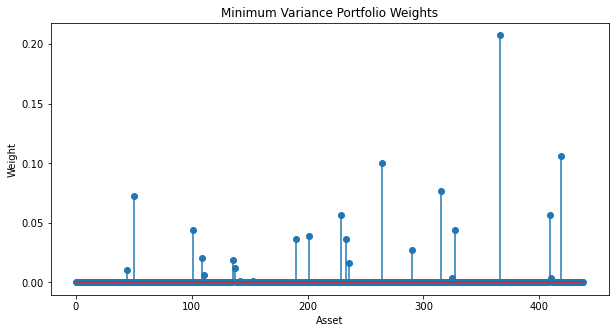

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Minimum Variance Portfolio Weights")
ax.stem(min_var_weights)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Mean Variance with Unbiased Sample Estimates

First need to determine bounds of potential mean-variance portfolios by computing min_var and max_return portfolios 

In [ ]:
max_ret_port=MaxRetPort(mean,max_pos=ub)
max_port_return = max_ret_port.dot(mean.T)


print(f"Maximum Return Portfolio Expected Return: {round(max_port_return,2)}")

Maximum Return Portfolio Expected Return: 0.2


Text(0, 0.5, 'Weight')

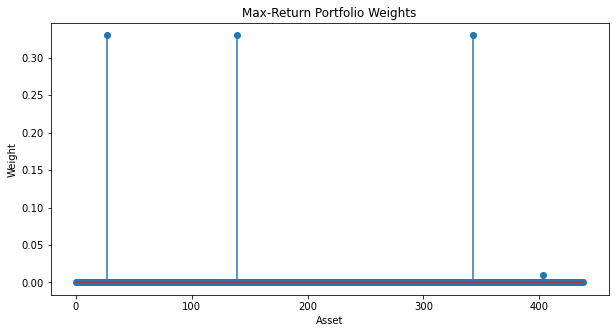

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Max-Return Portfolio Weights")
ax.stem(max_ret_port)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Generate a Sample Efficient Frontier

In [ ]:
bounds = [min_port_return, max_port_return]
risk, ret = MeanVarPort(bounds, train_data, num_port=10,verbose=True)



/home/jbohn/miniconda3/envs/research/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


For expected portfolio return of  0.04182050507925457
Portfolio Risk:  1.0797774709002035
Portfolio Return:  0.0607319058343762

For expected portfolio return of  0.057818863834950225
Portfolio Risk:  0.9800550491005182
Portfolio Return:  0.059793861586044814

For expected portfolio return of  0.07381722259064588
Portfolio Risk:  1.0163504128569798
Portfolio Return:  0.0730376844745835

For expected portfolio return of  0.08981558134634154
Portfolio Risk:  1.133649771638781
Portfolio Return:  0.09007323139649859

For expected portfolio return of  0.10581394010203721
Portfolio Risk:  1.2298517969733
Portfolio Return:  0.10602410558395586

For expected portfolio return of  0.12181229885773287
Portfolio Risk:  1.432955998055036
Portfolio Return:  0.12200681617154886

For expected portfolio return of  0.13781065761342853
Portfolio Risk:  1.4548111747632257
Portfolio Return:  0.13794347049402428

For expected portfolio return of  0.1538090163691242
Portfolio Risk:  1.4362532024446772
Portfo

### Select optimal portfolio by maximization of sharpe ratio

In [ ]:
optimal_mean, optimal_std = optimize_sharpe(risk, ret)
print(f"Optimal Mean: {round(optimal_mean,2)}")
print(f"Optimal Std: {round(optimal_std,2)}")


Optimal Mean: 0.15
Optimal Std: 1.44


### Solve for this portfolio of expected return

In [ ]:
optimal_mean_var_weights = MinVarPort(cov, mean,fixed_return=optimal_mean,flag= False)

Text(0, 0.5, 'Weight')

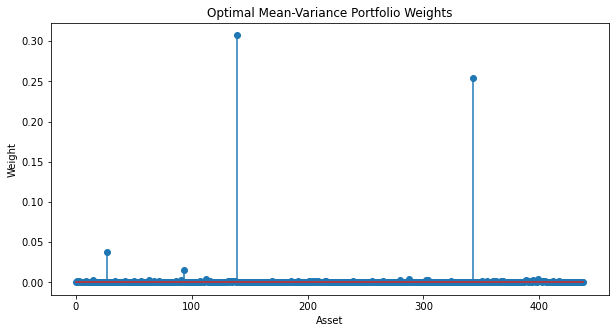

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Optimal Mean-Variance Portfolio Weights")
ax.stem(optimal_mean_var_weights)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")


### Biased Estimators


- $\mu \rightarrow{} \hat{\mu}$
- $\Sigma\rightarrow{} \rho \hat{\Sigma}+(1-\rho)I$

In [ ]:
bias_mean=reg_mean(train_data,train_data.shape[0])
bias_cov=reg_cov(train_data)


### Compute Min Var and Max Return Portfolio for Bounds 

In [ ]:
min_bias_var_weights=MinVarPort(bias_cov)
min_bias_port_return=np.dot(min_bias_var_weights,bias_mean)
print(f"Minimum variance portfolio return: {round(min_bias_port_return,2)}")

Minimum variance portfolio return: 0.04


In [ ]:
max_bias_ret_port=MaxRetPort(bias_mean)
max_bias_port_return = max_bias_ret_port.dot(bias_mean.T)
print(f"Maximum Return Portfolio Expected Return: {round(max_bias_port_return,2)}")

Maximum Return Portfolio Expected Return: 0.2


### Compute Efficient Frontier off Biased Estimators

In [ ]:
biased_bounds=[min_bias_port_return,max_bias_port_return]
biased_risk,biased_ret=MeanVarPort(biased_bounds,train_data,num_port=10,verbose=True)


For expected portfolio return of  0.043729447037962416
Portfolio Risk:  1.068864192938847
Portfolio Return:  0.06085048196433282

For expected portfolio return of  0.059525796935417825
Portfolio Risk:  0.9931445935565751
Portfolio Return:  0.06040048372043597

For expected portfolio return of  0.07532214683287324
Portfolio Risk:  1.0047490973547135
Portfolio Return:  0.07499452037038787

For expected portfolio return of  0.09111849673032865
Portfolio Risk:  1.1374839757881001
Portfolio Return:  0.09135868972129434

For expected portfolio return of  0.10691484662778405
Portfolio Risk:  1.2274687918867615
Portfolio Return:  0.10712056596401459

For expected portfolio return of  0.12271119652523946
Portfolio Risk:  1.4444360239289058
Portfolio Return:  0.12291897261849104

For expected portfolio return of  0.13850754642269486
Portfolio Risk:  1.4639199221233319
Portfolio Return:  0.13864123655479899

For expected portfolio return of  0.15430389632015026
Portfolio Risk:  1.5328383418983287

### Select Optimal Portfolio with Biased Estimators

In [ ]:
biased_optimal_mean,biased_optimal_std=optimize_sharpe(biased_risk,biased_ret)
print(f"Optimal Mean: {round(biased_optimal_mean,2)}")
print(f"Optimal Std: {round(biased_optimal_std,2)}")

Optimal Mean: 0.2
Optimal Std: 1.89


### Solve Optimal Biased Estimators Portfolio

In [ ]:
optimal_bias_portfolio=MinVarPort(bias_cov,bias_mean,fixed_return=biased_optimal_mean,flag=False)


Text(0, 0.5, 'Weight')

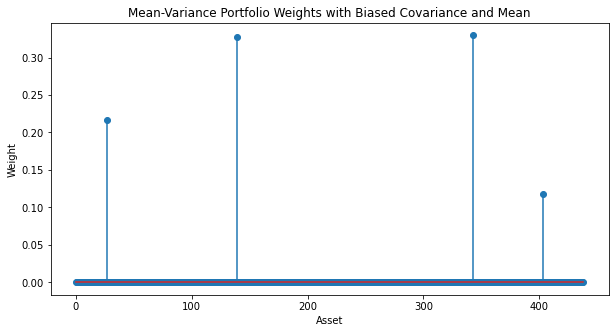

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Mean-Variance Portfolio Weights with Biased Covariance and Mean")
ax.stem(optimal_bias_portfolio)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Elastic Net Penalty Unbiased Sample Estimates 

In [ ]:
sorted_dict=grid_search(params,mean,cov,optimal_mean)


 lambda1: 1e-05 lambda2: 1e-05 error: 0.08324994
 lambda1: 1e-05 lambda2: 0.00017783 error: 0.08329866
 lambda1: 1e-05 lambda2: 0.00316228 error: 0.08538705
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 0.05623413251903491
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 1.0
 lambda1: 0.00017783 lambda2: 1e-05 error: 0.08391582
 lambda1: 0.00017783 lambda2: 0.00017783 error: 0.08396529
 lambda1: 0.00017783 lambda2: 0.00316228 error: 0.08609002
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 0.05623413251903491
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 1.0
 lambda1: 0.00316228 lambda2: 1e-05 error: 0.09575689
 lambda1: 0.00316228 lambda2: 0.00017783 error: 0.09581988
 lambda1: 0.00316228 lambda2: 0.00316228 error: 0.09859083
QP Optimizati

In [ ]:
optimal_lambda1,optimal_lambda2=sorted_dict[0][0][0],sorted_dict[1][0][1]

print(f" Optimal lambda1: {optimal_lambda1} Optimal lambda2: {optimal_lambda2} with error: {sorted_dict[0][1][1]} and Expected return: {optimal_mean}")
w_sb_unbias,w_sb_unbias_err,status_sb_unbias=split_bregman(cov=cov,mean=mean,lambda1=optimal_lambda1,lambda2=optimal_lambda2,fixed_return=optimal_mean,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)

 Optimal lambda1: 1e-05 Optimal lambda2: 0.00017782794100389227 with error: 0.08324994465352842 and Expected return: 0.1538090163691242
Total Cost: 0.3177270381716173
Total Cost: 0.31772703452996715
Total Cost: 0.31772703124167334
Total Cost: 0.3177270283042027
Total Cost: 0.31772702571522243
Total Cost: 0.3177270234725916
Total Cost: 0.31772702157434446
Total Cost: 0.3177270200186826
Total Cost: 0.3177270188039614
Total Cost: 0.31772701792868074
Total Cost: 0.3177270173914745
Total Cost: 0.31772701719110225
Total Cost: 0.3177270173264388
Total Cost: 0.31772701779646756
Total Cost: 0.3177270186002721
Total Cost: 0.3177270197370287
Total Cost: 0.3177270212059997
Total Cost: 0.3177270230065283
Total Cost: 0.31772702513803003
Total Cost: 0.31772702759999033
Total Cost: 0.31772703039195616
Total Cost: 0.3177270335135342
Total Cost: 0.31772703696438426
Total Cost: 0.3177270407442169
Total Cost: 0.3177270448527869
Total Cost: 0.3177270492898928
MaxIter Achieved


Text(0, 0.5, 'Weight')

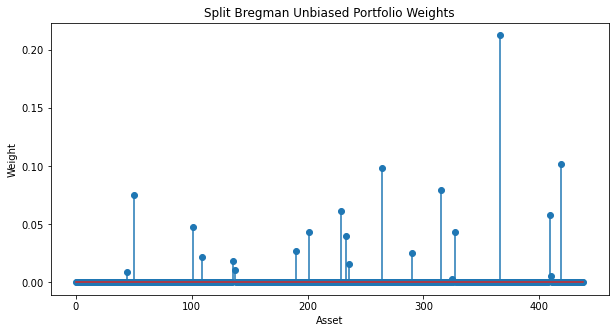

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Split Bregman Unbiased Portfolio Weights")
ax.stem(w_sb_unbias)

ax.set_xlabel("Asset")
ax.set_ylabel("Weight")

### Elastic Net Penalty with Biased Estimates

In [ ]:
bias_sorted_dict=grid_search(params,biased_mean,biased_cov,biased_optimal_mean,tol=10e-6,maxiter=25)


 lambda1: 1e-05 lambda2: 1e-05 error: 0.07041739
 lambda1: 1e-05 lambda2: 0.00017783 error: 0.07042041
 lambda1: 1e-05 lambda2: 0.00316228 error: 0.07047417
 lambda1: 1e-05 lambda2: 0.05623413 error: 0.07148754
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 1e-05 and lambda2: 1.0
 lambda1: 0.00017783 lambda2: 1e-05 error: 0.07061153
 lambda1: 0.00017783 lambda2: 0.00017783 error: 0.07061454
 lambda1: 0.00017783 lambda2: 0.00316228 error: 0.0706683
 lambda1: 0.00017783 lambda2: 0.05623413 error: 0.07168162
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.00017782794100389227 and lambda2: 1.0
 lambda1: 0.00316228 lambda2: 1e-05 error: 0.07406377
 lambda1: 0.00316228 lambda2: 0.00017783 error: 0.07406678
 lambda1: 0.00316228 lambda2: 0.00316228 error: 0.0741205
 lambda1: 0.00316228 lambda2: 0.05623413 error: 0.07513295
QP Optimization fails, Trying again
 Closed Form Optimization Failed for lambda1: 0.003162277660168379

In [ ]:
optimal_bias_lambda1,optimal_bias_lambda2=bias_sorted_dict[0][0][0],bias_sorted_dict[1][0][1]

print(f" Optimal lambda1: {optimal_bias_lambda1} Optimal lambda2: {optimal_bias_lambda2} with error: {bias_sorted_dict[0][1][1]} and Expected return: {biased_optimal_mean}")
w_sb_bias,w_sb_bias_err,status_sb_bias=split_bregman(cov=biased_cov,mean=biased_mean,lambda1=optimal_bias_lambda1,lambda2=optimal_bias_lambda2,fixed_return=biased_optimal_mean,lb=lb,ub=ub,tol=1e-8,maxiter=25,approach="closed-form",verbose=True)

 Optimal lambda1: 1e-05 Optimal lambda2: 0.00017782794100389227 with error: 0.07041739483615962 and Expected return: 0.12271119652523947
Total Cost: 0.11326542343212558
Total Cost: 0.11326544339385933
Total Cost: 0.11326546335783773
Total Cost: 0.11326548332406104
Total Cost: 0.11326550329252942
Total Cost: 0.11326552326324354
Total Cost: 0.11326554323620365
Total Cost: 0.11326556321140999
Total Cost: 0.11326558318886307
Total Cost: 0.11326560316856317
Total Cost: 0.11326562315051084
Total Cost: 0.11326564313470627
Total Cost: 0.11326566312114973
Total Cost: 0.11326568310984172
Total Cost: 0.1132657031007828
Total Cost: 0.11326572309397295
Total Cost: 0.1132657430894129
Total Cost: 0.11326576308710283
Total Cost: 0.11326578308704313
Total Cost: 0.11326580308923416
Total Cost: 0.1132658230936762
Total Cost: 0.11326584310036981
Total Cost: 0.11326586310931529
Total Cost: 0.11326588312051297
Total Cost: 0.11326590313396334
Total Cost: 0.1132659231496665
MaxIter Achieved


Text(0, 0.5, 'Weight')

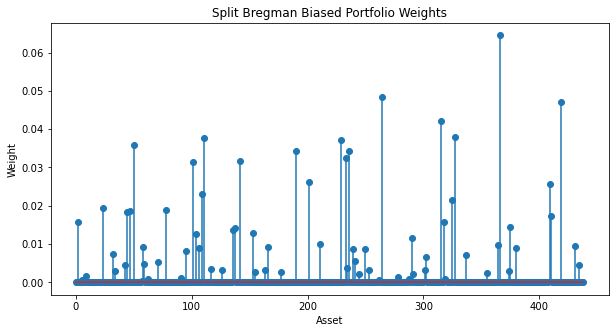

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("Split Bregman Biased Portfolio Weights")
ax.stem(w_sb_bias)
ax.set_xlabel("Asset")
ax.set_ylabel("Weight")


### Out of Sample Performance 

In [ ]:
test_data.T/100

NameError: name 'test_data' is not defined

Text(0, 0.5, 'Cumulative Returns')

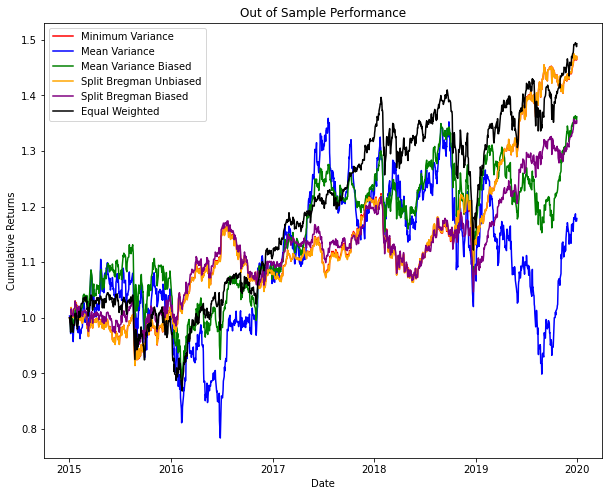

In [ ]:
cum_returns_1=np.cumprod(1+np.dot(min_var_weights,test_data.T/100))
cum_returns_2=np.cumprod(1+np.dot(optimal_mean_var_weights,test_data.T/100))
cum_returns_3=np.cumprod(1+np.dot(optimal_bias_portfolio,test_data.T/100))
cum_returns_4=np.cumprod(1+np.dot(w_sb_unbias,test_data.T/100))
cum_returns_5=np.cumprod(1+np.dot(w_sb_bias,test_data.T/100))

cum_returns_equal=np.cumprod(1+np.dot(np.ones(len(mean))/len(mean),test_data.T/100))


fig,ax=plt.subplots(figsize=(10,8))
plt.title("Out of Sample Performance")
plt.plot(pd.to_datetime(test_data.index),cum_returns_1,label='Minimum Variance',color='red')
plt.plot(pd.to_datetime(test_data.index),cum_returns_2,label='Mean Variance',color='blue')
plt.plot(pd.to_datetime(test_data.index),cum_returns_3,label='Mean Variance Biased',color='green')
plt.plot(pd.to_datetime(test_data.index),cum_returns_4,label='Split Bregman Unbiased',color='orange')
plt.plot(pd.to_datetime(test_data.index),cum_returns_5,label='Split Bregman Biased',color='purple')
plt.plot(pd.to_datetime(test_data.index),cum_returns_equal,label='Equal Weighted',color='black')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")


In [ ]:
def get_sharpe(port_returns,rf=0.025):
    de_meaned_returns=port_returns-1
    
    sd=np.std(de_meaned_returns-rf)
    mu=np.mean(de_meaned_returns)
    
    sharpe=(mu-rf)/sd
    
    return sharpe

In [ ]:
sharpe_1=get_sharpe(cum_returns_1)
sharpe_2=get_sharpe(cum_returns_2)
sharpe_3=get_sharpe(cum_returns_3)
sharpe_4=get_sharpe(cum_returns_4)
sharpe_5=get_sharpe(cum_returns_5)
sharpe_equal=get_sharpe(cum_returns_equal)

print(f"Minimum Variance Sharpe: {sharpe_1}")
print(f"Mean Variance Sharpe: {sharpe_2}")
print(f"Mean Variance Biased Sharpe: {sharpe_3}")

print(f"Split Bregman Unbiased Sharpe: {sharpe_4}")
print(f"Split Bregman Biased Sharpe: {sharpe_5}")
print(f"Equal Weighted Sharpe: {sharpe_equal}")


NameError: name 'cum_returns_1' is not defined